In [82]:
%matplotlib inline
from __future__ import print_function, division
import netCDF4, numpy
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(rc={'image.cmap': 'cubehelix'})
sns.set_context('poster')

import geopandas as gp
import folium
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.patches import PathPatch
import numpy as np

import matplotlib.colors
import numpy as np; np.random.seed(0)
import pandas as pd
import os


#from osgeo import gdal
from numpy import linspace
from numpy import meshgrid

"""
from osgeo import gdal
from osgeo import gdal_array
from osgeo import osr"""

In [107]:
counties_gp = gp.GeoDataFrame.from_file("/home/solo/Desktop/Data/Karina/CA_drought-master/data/Spatial/CA_counties/CA_counties_WGS_reporj.shp")
counties_gp.head(2)
print(counties_gp.columns)
lts = []
lns = []

for i in range(len(counties_gp["INTPTLAT"])):
    lts.append(float(counties_gp["INTPTLAT"][i]))
    lns.append(float(counties_gp["INTPTLON"][i]))
    #len(counties_gp["INTPTLON"]))
print(lts[0:5], lns[0:5])

Index([     u'ALAND',     u'AWATER',     u'CBSAFP',    u'CLASSFP',
         u'COUNTYFP',   u'COUNTYNS',      u'CSAFP',   u'FUNCSTAT',
            u'GEOID',   u'INTPTLAT',   u'INTPTLON',       u'LSAD',
         u'METDIVFP',      u'MTFCC',       u'NAME',   u'NAMELSAD',
         u'OBJECTID',    u'STATEFP', u'Shape_Area', u'Shape_Leng',
        u'geoid_num',   u'geometry'],
      dtype='object')
[39.5769252, 38.4500114, 34.5370572, 38.1838996, 34.3587415] [-120.5219926, -121.3404409, -120.0399729, -120.5614415, -119.1331432]


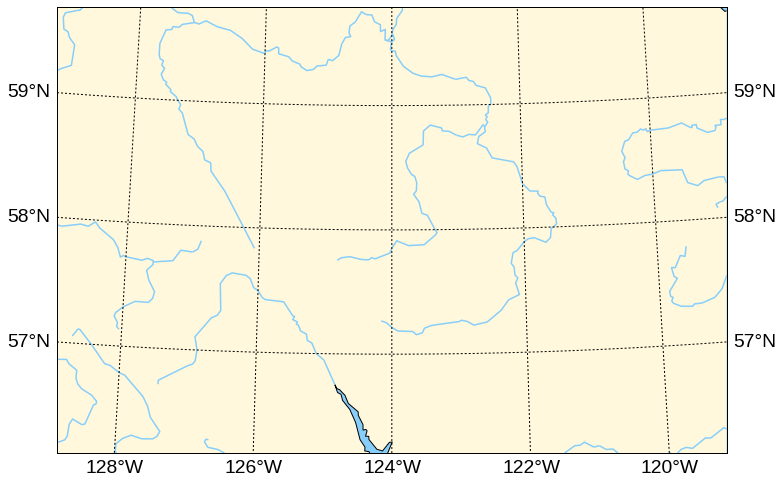

In [118]:
# This block is for making basemaps

from mpl_toolkits.basemap import Basemap
import numpy as np
water = 'lightskyblue'
earth = 'cornsilk'
juneau_lon, juneau_lat = -124.4167, 38.3
fig, ax1 = plt.subplots(figsize=(12, 10))
mm = Basemap(width=600000, height=400000,resolution='i',projection='aea',ellps='WGS84',#lat_1=55., #lat_2=65.,
     lat_0=58., lon_0=-124)
coast = mm.drawcoastlines()
rivers = mm.drawrivers(color=water, linewidth=1.5)
continents = mm.fillcontinents(color=earth,lake_color=water)
bound= mm.drawmapboundary(fill_color=water)
countries = mm.drawcountries()
merid = mm.drawmeridians(np.arange(-180, 180, 2), labels=[False, False, False, True])
parall = mm.drawparallels(np.arange(0, 80), labels=[True, True, False, False])
x, y = mm(juneau_lon, juneau_lat)
juneau = mm.scatter(x, y, 80, label="Juneau", color='red', zorder=10)

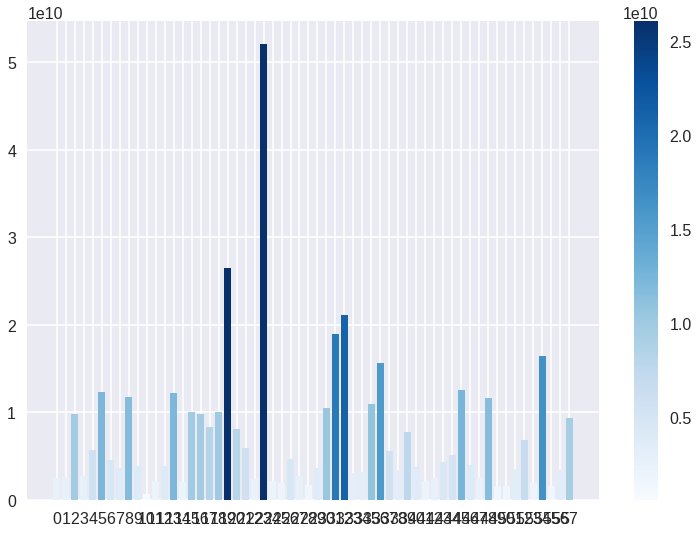

In [117]:
# Plot of areas of counties 

plt.figure(dpi=30)
x = np.arange(len(counties_gp["INTPTLAT"]))
y = counties_gp["Shape_Area"] #abs(x*(x)) #np.random.rand(len(x))*51
c = counties_gp["Shape_Area"] 
df = pd.DataFrame({"x":x,"y":y,"c":c})

cmap = plt.cm.Blues
#cmap = plt.cm.rainbow
norm = matplotlib.colors.Normalize(vmin=min(counties_gp["Shape_Area"]), vmax=max(counties_gp["Shape_Area"])/2)

fig, ax = plt.subplots()
ax.bar(df.x, df.y, color=cmap(norm(df.c)))
ax.set_xticks(df.x)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
fig.colorbar(sm)

plt.show()

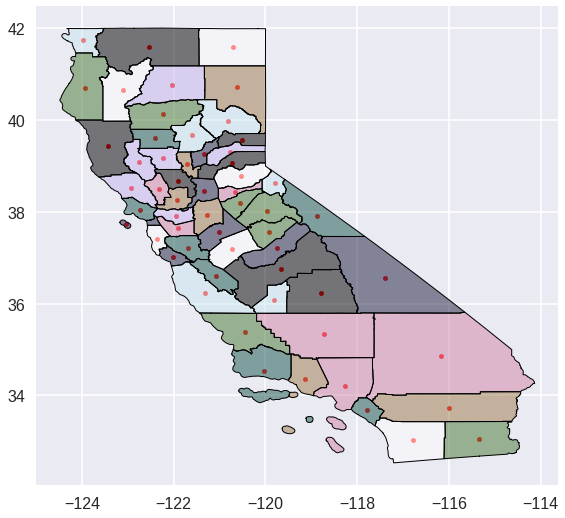

In [38]:
counties_gp.plot()
plt.scatter(lns, lts,marker="o", s=20, color='r', alpha=0.9)
plt.show()

In [47]:
# The NetCDF I/O files from VIC model archive

fname = "/home/solo/Desktop/Data/VIC_archive/fluxes.2015-12.nc"
#fname = "/home/solo/Desktop/Data/VIC_archive/cali1/ncdata.201401.nc"
data = netCDF4.Dataset(fname, "r")
data.variables

OrderedDict([(u'Soil_liquid', <type 'netCDF4._netCDF4.Variable'>
              float32 Soil_liquid(time, lat, lon)
                  _FillValue: 9.96921e+36
                  units: mm
              unlimited dimensions: time
              current shape = (31, 350, 310)
              filling on), (u'lat', <type 'netCDF4._netCDF4.Variable'>
              float64 lat(lat)
                  _FillValue: 9.96921e+36
                  units: degrees_north
              unlimited dimensions: 
              current shape = (350,)
              filling on), (u'lon', <type 'netCDF4._netCDF4.Variable'>
              float64 lon(lon)
                  _FillValue: 9.96921e+36
                  units: degrees_east
              unlimited dimensions: 
              current shape = (310,)
              filling on), (u'time', <type 'netCDF4._netCDF4.Variable'>
              float64 time(time)
                  _FillValue: 9.96921e+36
                  units: days since 0001-1-1 0:0:0
              unli

In [50]:
print("Time, Lat, Lon, Soil_liquid")
print(len(data["time"][:]), len(data["lat"][:]), len(data["lon"][:]),  len(data["Soil_liquid"][:]))

Time, Lat, Lon, Soil_liquid
31 350 310 31


In [51]:
data_lists = []
for time in range(len(data["time"][:])):
    data_list = []
    if time%20==0:
        for lat in range(len(data["lat"][:])):
            for lon in range(len(data["lon"][:])):
                d = float(data.variables["Soil_liquid"][time][lat][lon])
                if numpy.isnan(d) == True:
                    data_list.append(0)
                else:
                    data_list.append(d)
        data_lists.append(data_list)
    else:
        pass

/home/solo/anaconda2/lib/python2.7/site-packages/numpy/ma/core.py:4185: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


In [6]:
len(data_lists), len(data_lists[0])

(2, 108500)

In [7]:
lats, lons = [], []
for lat in range(350):
    for lon in range(310):
        lats.append(lat)
        lons.append(lon)
len(lats), len(lons)


(108500, 108500)

In [128]:
import os, glob
import matplotlib.pyplot as plt
from numpy import linspace, meshgrid
from matplotlib.mlab import griddata
import pip
#pip.main(["install", "imageio"])
import imageio

def grid(x, y, z, resX=100, resY=100):
    "Convert 3 column data to matplotlib grid"
    xi = linspace(min(x), max(x), resX)
    yi = linspace(min(y), max(y), resY)
    Z = griddata(x, y, z, xi, yi, interp='linear')
    X, Y = meshgrid(xi, yi)
    return X, Y, Z 

In [9]:
len(data_lists)

2

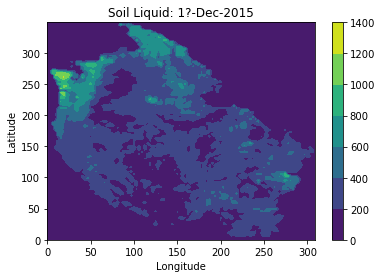

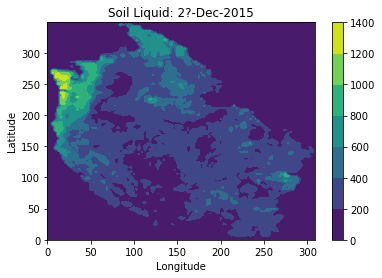

In [10]:
month, year = "Dec", "2015"
filenames = []
for i in range(len(data_lists)):
    day = str(i+1) + "?"
    z = data_lists[i]
    x = lons
    y = lats
    X, Y, Z = grid(x, y, z)
    plt.figure(i)
    plt.contourf(X, Y, Z)
    plt.colorbar()
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.title("Soil Liquid: " + str(day) + "-" + str(month) + "-" + str(year))
    #fname = "swe_" + str(i) + ".png"
    fname = "Soil_Liquid_" + str(i) + ".png"
    plt.savefig(fname)
    filenames.append(fname)
    plt.show()
else:
    pass

In [123]:
# Create an ascii grid from one time slice of data for all lat and long

ncols = len(data.variables["lon"][:])
nrows = len(data.variables["lat"][:])
xllcorner = min(data.variables["lon"][:]) 
yllcorner = min(data.variables["lat"][:])
cell_size =  abs(data.variables["lat"][1] - data.variables["lat"][0])
nodata_value = -9999
myArray = np.reshape(data_lists[0], (nrows, ncols))

with open("sm.asc", "w") as f:
    f.write("NCOLS " + str(ncols) + "\n")
    f.write("NROWS " + str(nrows) + "\n")
    f.write("XLLCORNER " + str(xllcorner) + "\n") 
    f.write("YLLCORNER " + str(yllcorner) + "\n")
    f.write("CELLSIZE " + str(cell_size) + "\n")
    f.write("NODATA_VALUE = -9999\n")
    data_2d =  np.reshape(data_lists[0], (nrows, ncols))
    for line in data_2d:
        f.write(str(list(line)).strip("[").strip("]")[1:].strip("\n") + "\n")

os.getcwd()

'/home/solo/Desktop/Data/VIC_archive'

In [21]:
# Create a GIF from the different time steps of the VIC I/O variables

images = []
for filename in filenames:
    images.append(imageio.imread(filename))
# Create GIF files from the snow water equivalent
#imageio.mimsave('SWE_GIF.gif', images, duration=0.5)
imageio.mimsave('Soil_Liquid_GIF.gif', images, duration=0.5)
os.getcwd()

'/home/solo/Desktop/Data/VIC_archive'

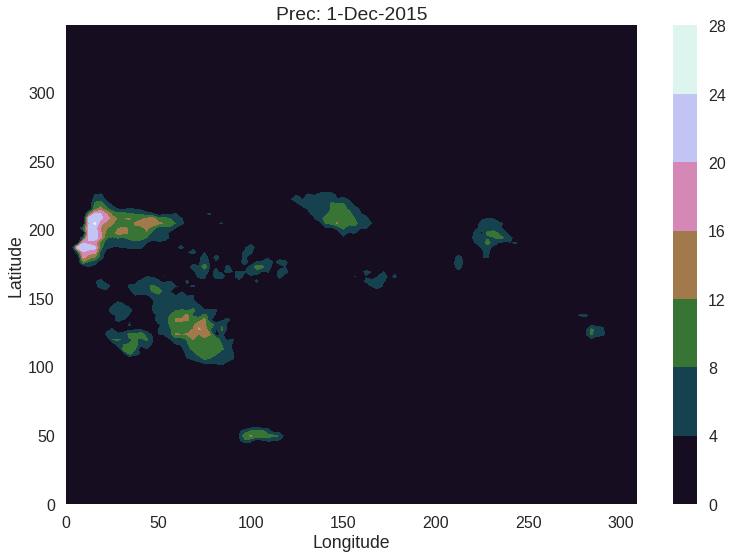

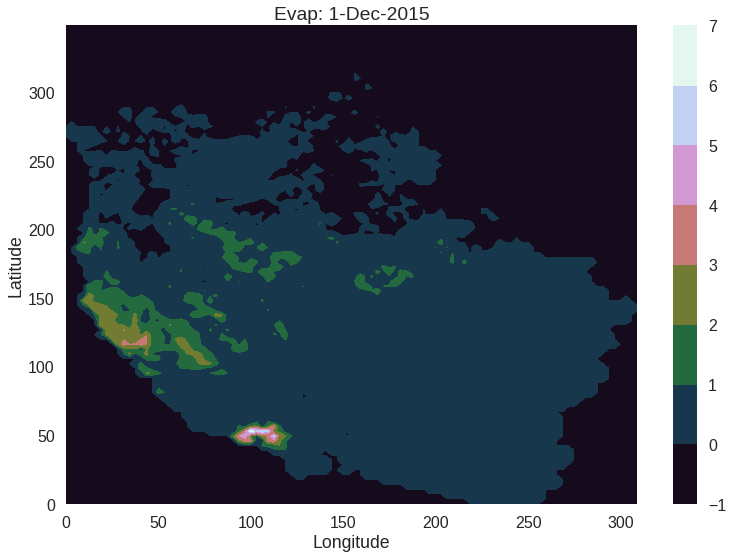

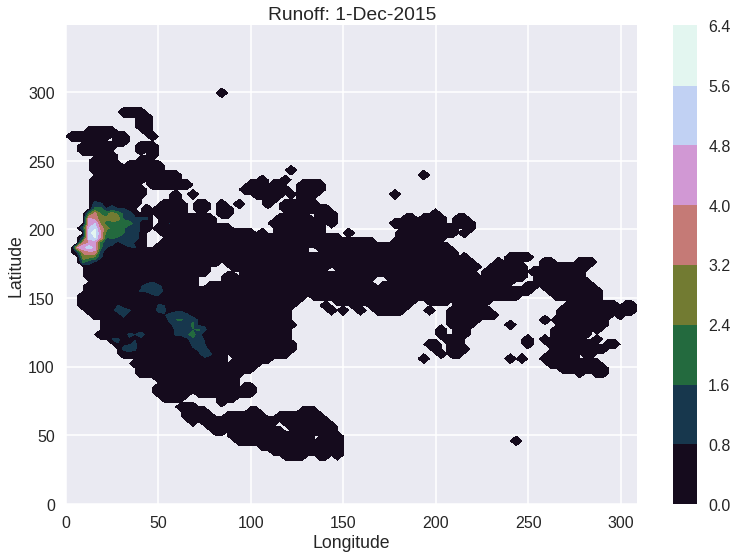

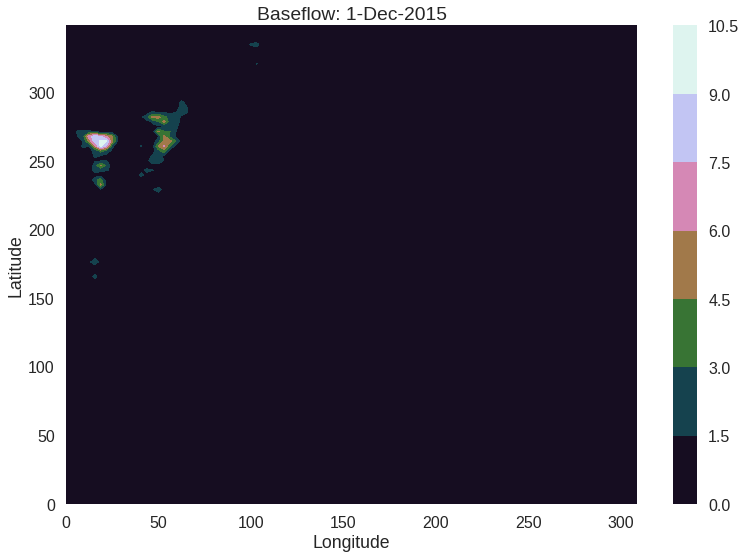

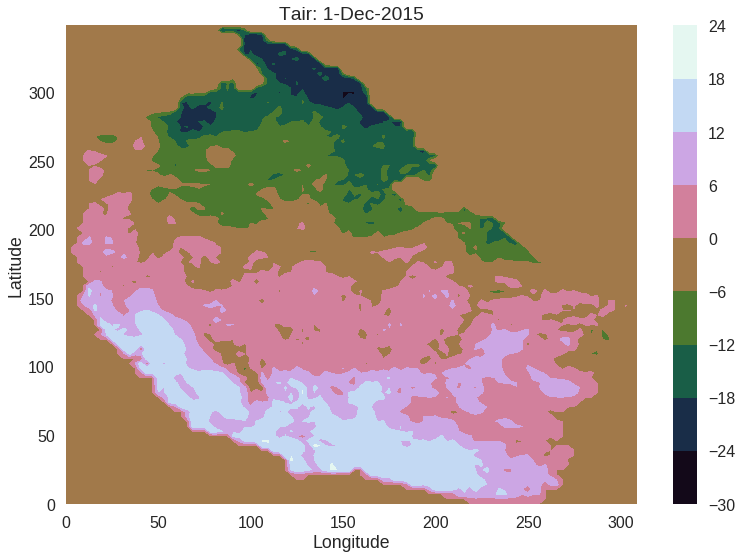

In [132]:
# Output Fluxes from VIC:
lats, lons = [], []
for lat in range(len(data["lat"][:])):
    for lon in range(len(data["lon"][:])):
        lats.append(lat)
        lons.append(lon)
len(lats), len(lons)

fname = "/home/solo/Desktop/Data/VIC_archive/Output_fluxes/fluxes.2014-12.nc"
data = netCDF4.Dataset(fname, "r")
data.variables

variables = ["Prec", "Evap", "Runoff", "Baseflow", "Tair", "Soil_liquid", "SWE"]
month, year = "Dec", "2015"
day=1
data_lists = []
filenames=[]
for i, var in enumerate(variables):
    for time in range(len(data["time"][0:1])):
        data_list = []
        if time==0:
            try:
                for lat in range(len(data["lat"][:])):
                    for lon in range(len(data["lon"][:])):
                        d = float(data.variables[var][time][lat][lon])
                        if numpy.isnan(d) == True:
                            data_list.append(0)
                        else:
                            data_list.append(d)
                data_lists.append(data_list)

                z = data_lists[i]
                x = lons
                y = lats
                X, Y, Z = grid(x, y, z)
                plt.figure(i)
                plt.contourf(X, Y, Z)
                plt.colorbar()
                plt.xlabel("Longitude")
                plt.ylabel("Latitude")
                plt.title(str(var)+": " + str(day) + "-" + str(month) + "-" + str(year))
                #fname = "swe_" + str(i) + ".png"
                fname = str(var)+ "_" + str(i) + ".png"
                plt.savefig(fname)
                filenames.append(fname)
                plt.show()
            except:
                pass
        else:
            pass

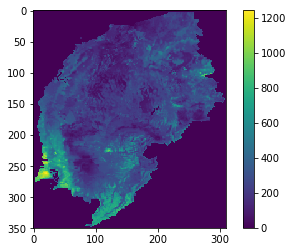

In [24]:
plt.imshow(myArray)
plt.colorbar()
plt.show()

-124.84375 31.15625 -105.53125 52.96875


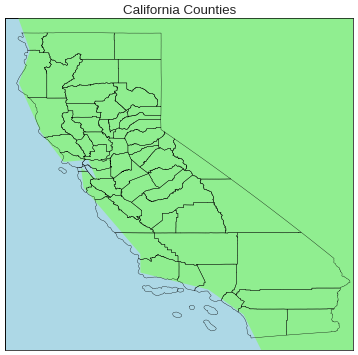

In [54]:
# California counties
print(min(data.variables["lon"][:]), min(data.variables["lat"][:]), max(data.variables["lon"][:]), max(data.variables["lat"][:]))
plt.figure(dpi=50)
plt.title("California Counties")
map = Basemap(llcrnrlon=min(data.variables["lon"][:]), 
              llcrnrlat=min(data.variables["lat"][:])+1, 
              urcrnrlon=max(data.variables["lon"][:])-8.5, 
              urcrnrlat=max(data.variables["lat"][:])-10.5)

map.drawmapboundary(fill_color='lightblue')
map.fillcontinents(color='lightgreen',lake_color='cyan') # brown = '#ddaa66'
map.readshapefile("/home/solo/Desktop/Data/Karina/CA_drought-master/data/Spatial/CA_counties/CA_counties_WGS_reporj", "counties")
#map.drawcoastlines()
#a, b = map(-120.5219926, 39.5769252)
#plt.plot(map(-120.5219926, 39.5769252), size=10, color='r')
plt.show()

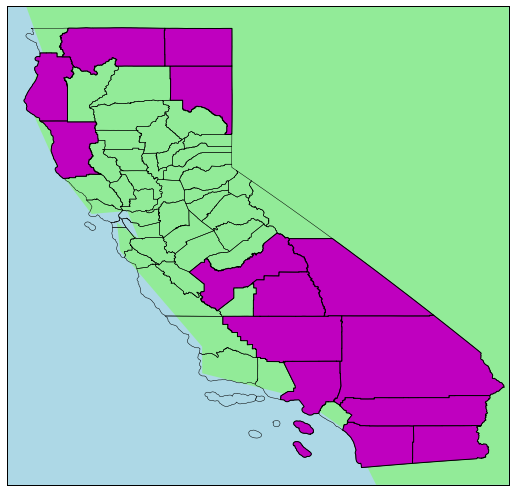

In [90]:
# This part is to color the polygons based on a value and condition

fig     = plt.figure()
ax      = fig.add_subplot(111)
map = Basemap(llcrnrlon=min(data.variables["lon"][:]), llcrnrlat=min(data.variables["lat"][:])+1, 
              urcrnrlon=max(data.variables["lon"][:])-8.5, urcrnrlat=max(data.variables["lat"][:])-10.5)
map.drawmapboundary(fill_color='lightblue')
map.fillcontinents(color='lightgreen',alpha=0.9,lake_color='cyan') # brown = '#ddaa66'
map.readshapefile("/home/solo/Desktop/Data/Karina/CA_drought-master/data/Spatial/CA_counties/CA_counties_WGS_reporj", "counties")

patches   = []
for info, shape in zip(map.counties_info, map.counties):
    #print(info)
    #print(shape)
    if info["Shape_Area"] > 10000000000:
        patches.append( Polygon(np.array(shape), True) )
ax.add_collection(PatchCollection(patches, facecolor= 'm', edgecolor='k', linewidths=1., zorder=2))

In [ ]:
# compute map projection coordinates for lat/lon grid.
# https://matplotlib.org/basemap/api/basemap_api.html?highlight=imshow#mpl_toolkits.basemap.Basemap.imshow

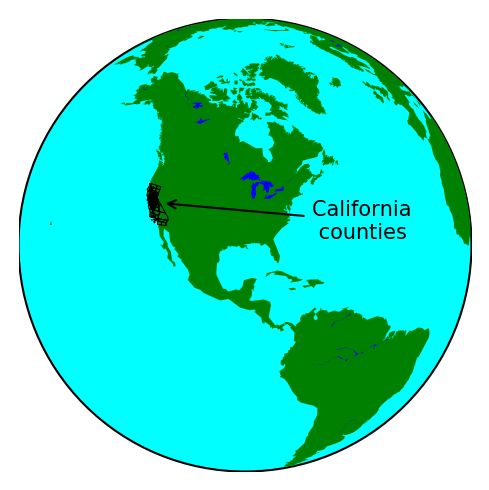

In [366]:
# 3D Globe View
plt.figure(dpi=150)
map = Basemap(projection='ortho', lat_0=30, lon_0=-90)
#llcrnrx=min(data.variables["lon"][:]),llcrnry=min(data.variables["lat"][:]),urcrnrx=max(data.variables["lon"][:]),urcrnry=max(data.variables["lat"][:])

map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='green',lake_color='blue')
map.readshapefile("/home/solo/Desktop/Data/Karina/CA_drought-master/data/Spatial/CA_counties/CA_counties_WGS_reporj", "counties")
#map.drawcoastlines()
x, y = map(-118, 38)
#x2, y2 = (-90, 10)
#plt.annotate('Barcelona', xy=(x, y),  xycoords='data', xytext=(x2, y2), textcoords='offset points',color='r', arrowprops=dict(arrowstyle="fancy", color='g'))
x2, y2 = map(-70, 30)
plt.annotate('California \n counties', xy=(x, y),  xycoords='data', xytext=(x2, y2), textcoords='data',
                arrowprops=dict(arrowstyle="->"))
map.contourf(data=Z,x=X, y=Y)
plt.show()